# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data
df = pd.read_csv('/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [4]:
# get the number of rows and columns
rows, columns = df.shape

print(f'There are {rows} rows and {columns} columns in the data')

There are 1898 rows and 9 columns in the data


#### Observations:
The dataset contains 1898 rows and 9 columns. This means we have 1898 individual orders with 9 different types of information about each order.



### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [5]:
# get the info of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The .info() method provides us with the data types of each column.

For example, if 'order_id' and 'customer_id' are of integer type, it means these are numerical identifiers.

If 'restaurant_name' and 'cuisine_type' are of object type, it means these are likely categorical variables represented as strings.

'cost_of_the_order' might be a float, indicating it's a numerical variable representing the cost of each order.

Understanding the data types can help us decide how to handle each column in later stages of the analysis.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [6]:
# count the number of 'Not Given' entries in the 'rating' column
not_given_ratings = df[df['rating'] == 'Not given'].shape[0]
print(f'There are {not_given_ratings} "Not given" entries in the rating column.')

# replace 'Not Given' with np.nan
df['rating'] = df['rating'].replace('Not given', np.nan)

# check for missing values again
missing_values = df.isnull().sum()
print('*'*5,'Missing Values per Column','*'*5)
print(missing_values)

There are 736 "Not given" entries in the rating column.
***** Missing Values per Column *****
order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64


#### Observations:


1.   The 'rating' column contained some entries with the value "Not Given", which we treated as missing data. There were 736 such entries.
2.   We replaced these "Not Given" entries with np.nan to represent them as actual missing values.
3.  We can see that 'rating' is the only column with missing values in the data



### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [7]:
# get the statistical summary of the data
summary = df.describe()

# print the summary
print(summary)

# get the minimum, mean, and maximum food preparation time
min_prep_time = summary.loc['min', 'food_preparation_time']
mean_prep_time = summary.loc['mean', 'food_preparation_time']
max_prep_time = summary.loc['max', 'food_preparation_time']

print(f'The minimum time it takes for food to be prepared once an order is placed is {min_prep_time} minutes.')
print(f'The average time it takes for food to be prepared once an order is placed is {mean_prep_time} minutes.')
print(f'The maximum time it takes for food to be prepared once an order is placed is {max_prep_time} minutes.')

           order_id    customer_id  cost_of_the_order  food_preparation_time  \
count  1.898000e+03    1898.000000        1898.000000            1898.000000   
mean   1.477496e+06  171168.478398          16.498851              27.371970   
std    5.480497e+02  113698.139743           7.483812               4.632481   
min    1.476547e+06    1311.000000           4.470000              20.000000   
25%    1.477021e+06   77787.750000          12.080000              23.000000   
50%    1.477496e+06  128600.000000          14.140000              27.000000   
75%    1.477970e+06  270525.000000          22.297500              31.000000   
max    1.478444e+06  405334.000000          35.410000              35.000000   

       delivery_time  
count    1898.000000  
mean       24.161749  
std         4.972637  
min        15.000000  
25%        20.000000  
50%        25.000000  
75%        28.000000  
max        33.000000  
The minimum time it takes for food to be prepared once an order is place

#### Observations
1. The statistical summary provides us with a broad overview of the distribution of values in each numerical column.
2. The minimum time it takes for food to be prepared once an order is placed is 20 minutes, the average time is 27.37 minutes, and the maximum time is 35 minutes. This gives us an idea of the range and central tendency of the food preparation times.




### **Question 5:** How many orders are not rated?

In [8]:
# count the number of missing values in the 'rating' column
not_rated_orders = df['rating'].isnull().sum()

print(f'There are {not_rated_orders} orders that are not rated.')

There are 736 orders that are not rated.


#### Observations:
There are 736 orders that are not rated. This could be because the customers chose not to rate their orders, or because there was an issue with the rating process.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

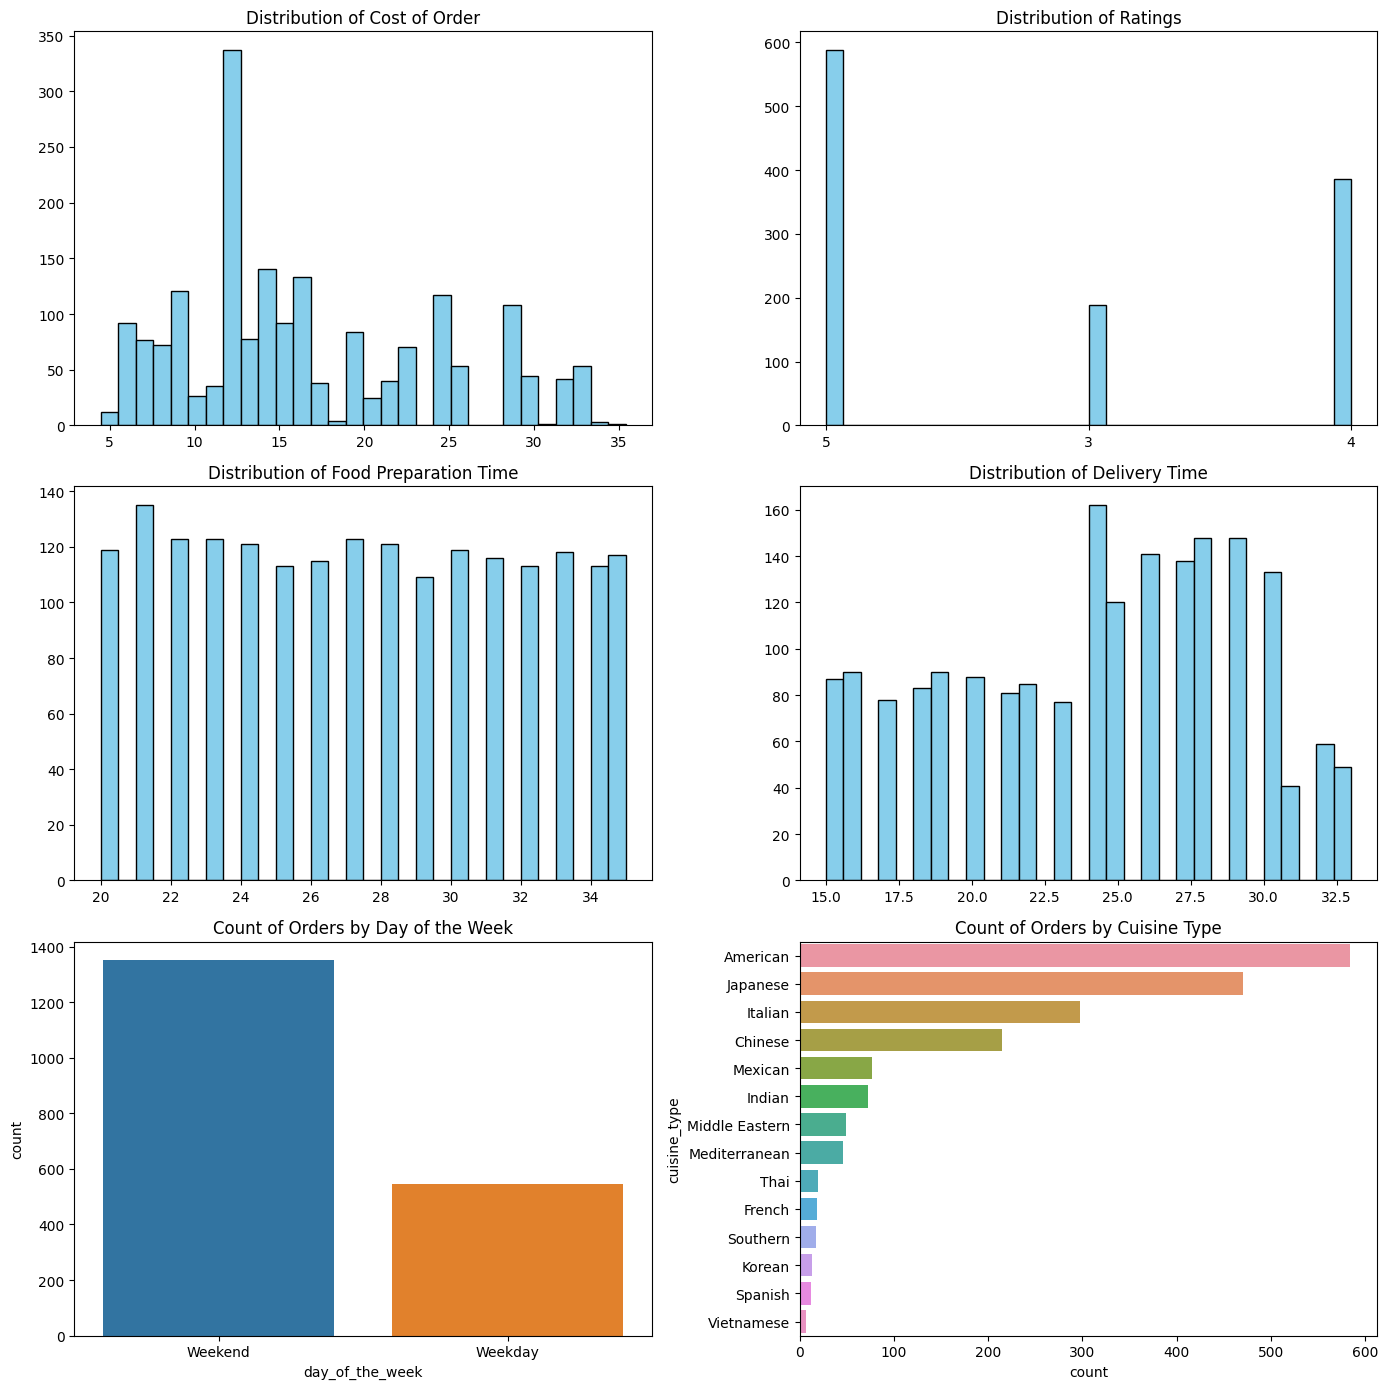

In [9]:
# set up the figure size
plt.figure(figsize=(14, 14))

# histogram of the 'cost_of_order'
plt.subplot(3, 2, 1)
plt.hist(df['cost_of_the_order'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Cost of Order')

# histogram of the 'rating'
plt.subplot(3, 2, 2)
plt.hist(df['rating'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')

# histogram of the 'food_preparation_time'
plt.subplot(3, 2, 3)
plt.hist(df['food_preparation_time'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Food Preparation Time')

# histogram of the 'delivery_time'
plt.subplot(3, 2, 4)
plt.hist(df['delivery_time'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Delivery Time')

# countplot of the 'day_of_the_week'
plt.subplot(3, 2, 5)
sns.countplot(x=df['day_of_the_week'])
plt.title('Count of Orders by Day of the Week')

# countplot of the 'cuisine_type'
plt.subplot(3, 2, 6)
sns.countplot(y=df['cuisine_type'], order=df['cuisine_type'].value_counts().index)
plt.title('Count of Orders by Cuisine Type')

plt.tight_layout()
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [10]:
# get the top 5 restaurants in terms of the number of orders received
top_5_restaurants = df['restaurant_name'].value_counts().head(5)

print(top_5_restaurants)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


#### Observations:
1. The top 5 restaurants in terms of the number of orders received are 'Shacke Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken', and 'Parm'.

2. 'Shake Shack ' received the most orders, followed by 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken', and 'Parm'.


### **Question 8**: Which is the most popular cuisine on weekends?

In [11]:
# filter the DataFrame for orders placed on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']

# find the most popular cuisine on weekends
most_popular_cuisine_weekend = df_weekend['cuisine_type'].value_counts().idxmax()

print(f'The most popular cuisine on weekends is {most_popular_cuisine_weekend}.')

The most popular cuisine on weekends is American.


#### Observations:
The most popular cuisine on weekends is 'American'.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [12]:
# filter the DataFrame for orders with a cost greater than 20
df_cost_more_than_20 = df[df['cost_of_the_order'] > 20]

# calculate the percentage of these orders
percentage = (len(df_cost_more_than_20) / len(df)) * 100

print(f'{percentage:.2f}% of the orders cost more than 20 dollars.')

29.24% of the orders cost more than 20 dollars.


#### Observations:
29.24% of the orders cost more than 20 dollars.


### **Question 10**: What is the mean order delivery time?

In [16]:
# calculate the mean order delivery time
mean_delivery_time = df['delivery_time'].mean()

print(f'The mean order delivery time is {mean_delivery_time:.2f} minutes.')

The mean order delivery time is 24.16 minutes.


#### Observations:
The mean order delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [27]:
# get the top 3 most frequent customers and the number of orders they placed
top_3_customers = df['customer_id'].value_counts().head(3)

# print the IDs of the customers and the number of orders they placed
for customer_id, num_orders in top_3_customers.items():
    print(f'Customer ID: {customer_id}, Number of Orders: {num_orders}')

Customer ID: 52832, Number of Orders: 13
Customer ID: 47440, Number of Orders: 10
Customer ID: 83287, Number of Orders: 9


#### Observations:
1. The top 3 most frequent customers are 52832, 47440, and 83287.

2. 52832 placed the most orders with 13, followed by 47440 with 10 and 83287 with 9.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

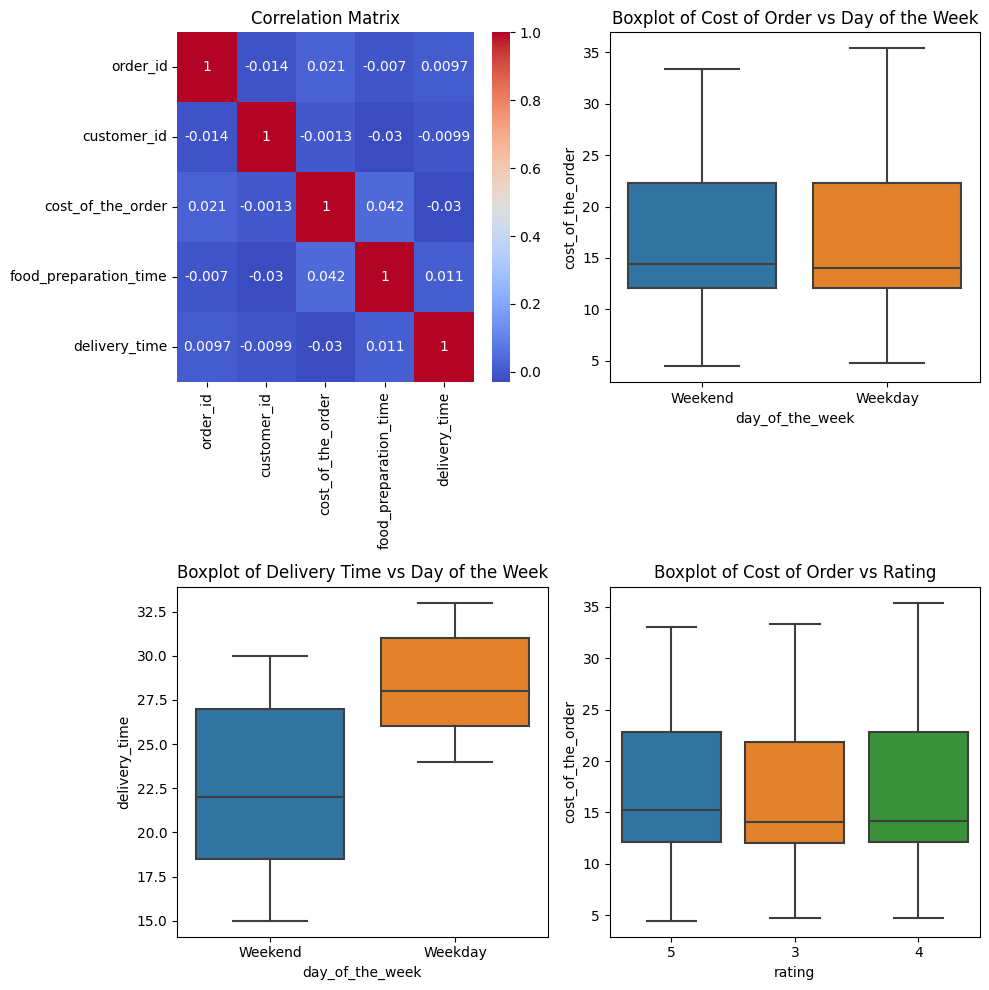

In [43]:
# create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# correlation matrix of numerical variables
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('Correlation Matrix')  # set the title for the subplot

# boxplot of 'cost_of_order' vs 'day_of_the_week'
sns.boxplot(x='day_of_the_week', y='cost_of_the_order', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Cost of Order vs Day of the Week')  # set the title for the subplot

# boxplot of 'delivery_time' vs 'day_of_the_week'
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of Delivery Time vs Day of the Week')  # set the title for the subplot

# boxplot of 'cost_of_order' vs 'rating'
sns.boxplot(x='rating', y='cost_of_the_order', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of Cost of Order vs Rating')  # set the title for the subplot

# adjust the layout so that the subplots do not overlap
plt.tight_layout()

# display the plots
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [45]:
# count the number of ratings for each restaurant
rating_counts = df['restaurant_name'][df['rating'].notna()].value_counts()

# create a new dataframe with only the rows where a rating was given
highly_rated_restaurants = df.loc[df['rating'].notna()].copy()

# convert the 'rating' column to float
highly_rated_restaurants['rating'] = highly_rated_restaurants['rating'].astype(float)

# calculate the average rating for each restaurant
average_rating = highly_rated_restaurants.groupby('restaurant_name')['rating'].mean()

# create a new dataframe with the rating count and average rating for each restaurant
restaurants_with_offer = pd.DataFrame({'rating_count': rating_counts, 'average_rating': average_rating})

# filter the dataframe to include only restaurants with more than 50 ratings and an average rating greater than 4
restaurants_with_offer = restaurants_with_offer[(restaurants_with_offer['rating_count'] > 50) & (restaurants_with_offer['average_rating'] > 4)]

restaurants_with_offer

,rating_count,average_rating
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


#### Observations:


*   The restaurants "Blue Ribbon Fried Chicken", "Blue Ribbon Sushi", "Shake Shack", and "The Meatball Shop" are the ones that fulfill the criteria to get the promotional offer.
*   "Blue Ribbon Fried Chicken" has received 64 ratings with an average rating of approximately 4.33.
* "Blue Ribbon Sushi" has received 73 ratings with an average rating of approximately 4.22.
* "Shake Shack" has received 133 ratings, the highest among these restaurants, with an average rating of approximately 4.28.
* "The Meatball Shop" has received 84 ratings with an average rating of approximately 4.51, the highest average rating among these restaurants.

These restaurants have consistently received high ratings from a large number of customers, indicating that they provide good quality food and service.
The promotional offer could help these restaurants attract even more customers and further increase their popularity.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [48]:
# calculate the revenue for orders with cost greater than 20 dollars
revenue_25_percent = df['cost_of_the_order'][df['cost_of_the_order'] > 20] * 0.25

# calculate the revenue for orders with cost greater than 5 dollars and less than or equal to 20 dollars
revenue_15_percent = df['cost_of_the_order'][(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)] * 0.15

# calculate the total net revenue
net_revenue = revenue_25_percent.sum() + revenue_15_percent.sum()

# print the net revenue
print(f'The net revenue generated by the company across all orders is ${net_revenue:.2f}')

The net revenue generated by the company across all orders is $6166.30


#### Observations:
The net revenue generated by the company across all orders is $6166.30.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [50]:
# calculate the total time required to deliver the food
total_time = df['food_preparation_time'] + df['delivery_time']

# find the orders that take more than 60 minutes to get delivered
orders_over_60_minutes = total_time[total_time > 60]

# calculate the percentage of orders that take more than 60 minutes to get delivered
percentage_over_60_minutes = (len(orders_over_60_minutes) / len(total_time)) * 100

# print the percentage
print(f'{percentage_over_60_minutes:.2f}% of orders take more than 60 minutes to get delivered.')

10.54% of orders take more than 60 minutes to get delivered.


#### Observations:
* Approximately 10.54% of orders take more than 60 minutes to get delivered from the time the order is placed.

* The company may want to investigate why these orders are taking longer to deliver. It could be due to factors such as the complexity of the dishes ordered, the distance between the restaurant and the customer, or the efficiency of the delivery process.
*
Reducing the delivery time could improve customer satisfaction and potentially increase the number of orders.



### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [51]:
# calculate the mean delivery time on weekdays
mean_delivery_time_weekdays = df['delivery_time'][df['day_of_the_week'] == 'Weekday'].mean()

# calculate the mean delivery time on weekends
mean_delivery_time_weekends = df['delivery_time'][df['day_of_the_week'] == 'Weekend'].mean()

# print the mean delivery times
print(f'The mean delivery time on weekdays is {mean_delivery_time_weekdays:.2f} minutes.')
print(f'The mean delivery time on weekends is {mean_delivery_time_weekends:.2f} minutes.')

# compare the mean delivery times
if mean_delivery_time_weekdays > mean_delivery_time_weekends:
    print('The mean delivery time is longer on weekdays.')
elif mean_delivery_time_weekdays < mean_delivery_time_weekends:
    print('The mean delivery time is longer on weekends.')
else:
    print('The mean delivery time is the same on weekdays and weekends.')

The mean delivery time on weekdays is 28.34 minutes.
The mean delivery time on weekends is 22.47 minutes.
The mean delivery time is longer on weekdays.


#### Observations:
* The mean delivery time on weekdays is approximately 28.34 minutes, while on weekends it is approximately 22.47 minutes.

* This indicates that the delivery time is longer on weekdays compared to weekends.

* There could be several reasons for this difference. For example, there might be more traffic on weekdays, or the volume of orders might be higher, leading to longer delivery times.

* The company could consider strategies to reduce delivery times on weekdays, such as optimizing delivery routes or increasing the number of delivery personnel. This could help improve customer satisfaction and potentially increase the number of orders.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  The top five restaurants in terms of the number of orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm. These restaurants are popular among the customers.

* The most popular cuisine on weekends is American. This indicates a preference for American cuisine among the customers during weekends.

* Approximately **29.24% of the orders cost more than 20 dollars**. This suggests that a significant proportion of customers are willing to spend more than 20 dollars on their orders.

* The **mean order delivery time is 24.16 minutes**. This is a reasonable delivery time, but there may be room for improvement.

* The customers with IDs 52832, 47440, and 83287 are the most frequent customers. They have placed 13, 10, and 9 orders respectively.

* The restaurants Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop fulfill the criteria to get the promotional offer. These restaurants have a rating count of more than 50 and an average rating greater than 4.

* The **net revenue generated by the company across all orders is $6166.30**. This revenue is generated by charging the restaurants a percentage of the cost of the orders.

* Approximately **10.54% of orders take more than 60 minutes to get delivered**. This indicates that there may be some issues with the delivery process for these orders.

* The **mean delivery time is longer on weekdays (28.34 minutes) compared to weekends (22.47 minutes)**. This suggests that there may be factors such as traffic or higher order volume that affect delivery time on weekdays.

### Recommendations:

*  The company could consider providing promotional offers or discounts for the top five restaurants to encourage more orders from these popular restaurants.

* Given the popularity of American cuisine on weekends, the company could consider promoting American cuisine more heavily during weekends.

* The company could consider offering a loyalty program or rewards for frequent customers. This could encourage more orders from the customers who order frequently.

* The company could consider **working with the restaurants to improve the food preparation and delivery process for orders that take more than 60 minutes to get delivered**. This could improve customer satisfaction and potentially increase the number of orders.

* The company could consider **strategies to reduce delivery times on weekdays**, such as optimizing delivery routes or increasing the number of delivery personnel. This could help improve customer satisfaction and potentially increase the number of orders.

* The company could consider providing additional promotional offers or benefits for the restaurants that have a high rating count and average rating. This could encourage these restaurants to maintain their high standards and attract more customers.

---